In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [261]:
train = pd.read_csv("~/data-science-projects/data-sources/subs.csv")

In [262]:
print('dataset has {} Number of rows and {} number of columns'.\
      format(train.shape[0],train.shape[1]))

dataset has 20000 Number of rows and 15 number of columns


In [263]:
train.describe(include=["object", "bool"])

,BRAND,DEVICE_MANUFACTURER_TXT,MUNICIPALITY_NM,PROVINCE_STATE_CD,PRICE_PLAN,SEGMENT_NM,LOCALITY_NM,LIFESTAGE
count,20000,19983,20000,19995,20000,20000,20000,20000
unique,2,44,998,13,729,58,20,9
top,T,Apple,CALGARY,AB,"Peace of Mind - Unlimited nationwide talk, tex...",Suburban Sports,Upper-Middle Suburbia,Middle-Age Families
freq,16862,12341,2808,11244,3575,1409,2978,6559


In [264]:
#let's have a look at the head
train.head(5)

,BAN_hashed,IMSI_hashed,BRAND,DEVICE_MANUFACTURER_TXT,MUNICIPALITY_NM,PROVINCE_STATE_CD,TENURE_DAY_QTY_SCALED,PRICE_PLAN,PROD_TV,PROD_INTERNET,SEGMENT_NM,LOCALITY_NM,LIFESTAGE,THREE_MONTH_AVG_WLN_BILLING_SCALED,THREE_MONTH_AVG_WLS_BILLING_SCALED
0,114717207,906661635071028,T,Apple,SURREY,BC,0.013143,PROMO - Peace of Mind-Unlimited nationwide tal...,1,1,Metro Melting Pot,Midscale Urban Fringe,Middle-Age Families,0.022209,0.052745
1,112418388,906660952816959,K,Samsung,PORT COQUITLAM,BC,0.261786,$45 2GB Unltd min Plan SFD,1,0,Metro Melting Pot,Midscale Urban Fringe,Middle-Age Families,0.029938,0.095285
2,53146188,906660062171958,T,Apple,EDMONTON,AB,0.321214,"Peace of Mind - Unlimited nationwide talk, tex...",1,0,Social Networkers,Young Urban Core,Very Young Singles & Couples,0.021639,0.047167
3,30467094,906660089430135,T,Samsung,CALGARY,AB,0.415714,L&R ULNW 5GB shareable data,1,0,Social Networkers,Young Urban Core,Very Young Singles & Couples,0.017315,0.026276
4,97147194,906661629073089,T,Samsung,VANCOUVER,BC,0.125429,3GB Premium 85 - non-share 500 nationwide minu...,1,0,Social Networkers,Young Urban Core,Very Young Singles & Couples,0.024490,0.051316


In [265]:
#now let's look at some variables one by one
train.dtypes
train.info()  #checks the informarion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   BAN_hashed                          20000 non-null  int64  
 1   IMSI_hashed                         20000 non-null  int64  
 2   BRAND                               20000 non-null  object 
 3   DEVICE_MANUFACTURER_TXT             19983 non-null  object 
 4   MUNICIPALITY_NM                     20000 non-null  object 
 5   PROVINCE_STATE_CD                   19995 non-null  object 
 6   TENURE_DAY_QTY_SCALED               20000 non-null  float64
 7   PRICE_PLAN                          20000 non-null  object 
 8   PROD_TV                             20000 non-null  int64  
 9   PROD_INTERNET                       20000 non-null  int64  
 10  SEGMENT_NM                          20000 non-null  object 
 11  LOCALITY_NM                         20000

In [143]:
train.groupby('PROD_INTERNET').size()

PROD_INTERNET
0     7526
1    11951
dtype: int64

In target column we have almost 82% as 0 and 18% as 1. so there's class imbalance in our dataset.

In [241]:
#BAN_hashed is just the hashed identifier of subscriber account it has no use in building model so we can drop it
# train.drop('BAN_hashed',axis=1,inplace=True)
train_trimmed = train.drop('BAN_hashed',axis=1)

In [242]:
#IMSI_hashed is just Hashed identifier of a subscriber (one account can have multiple subscribers) it has no use in building model so we can drop it
train_trimmed.drop('IMSI_hashed',axis=1,inplace=True)

In [243]:
#as per data dictinary: Hashed identifier of a subscriber (one account can have multiple subscribers)
#I want to find out how many accounts have multiple subscribers and what iut means???
#len(train['BAN_hashed'].unique())
len(train['BAN_hashed'])-len(train['BAN_hashed'].drop_duplicates())

1408

In [244]:
#percentage of PROD_INTERNET subscription
train['PROD_INTERNET'].value_counts()
train['PROD_INTERNET'].value_counts(normalize=True)

1    0.613596
0    0.386404
Name: PROD_INTERNET, dtype: float64

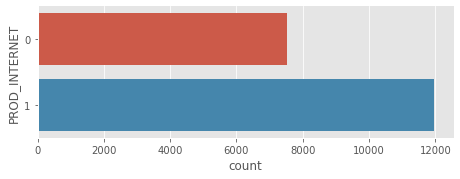

In [245]:
#visualize PROD_INTERNET counts
ax = sns.catplot(y='PROD_INTERNET',kind ='count',data=train,height=2.6,aspect=2.5)

In [246]:
#percentage of PROD_TV subscription
train['PROD_TV'].value_counts()
train['PROD_TV'].value_counts(normalize=True)

1    0.710274
0    0.289726
Name: PROD_TV, dtype: float64

In [247]:
#Correlation between PROD_INTERNET customers and PROD_TV customers
train.groupby(['PROD_INTERNET','PROD_TV']).size()
train.groupby(['PROD_TV','PROD_INTERNET']).agg({'PROD_INTERNET': 'count'})

PROD_INTERNET
PROD_TV PROD_INTERNET               
0       1                       5643
1       0                       7526
        1                       6308

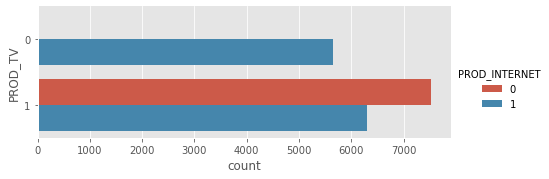

In [248]:
#visualize PROD_TV counts
ax = sns.catplot(y='PROD_TV',kind ='count',data=train,height=2.6,aspect=2.5,hue ='PROD_INTERNET')

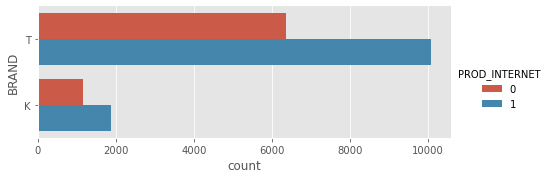

In [252]:
#visualize BRAND counts
ax = sns.catplot(y='BRAND',kind ='count',data=train,height=2.6,aspect=2.5,hue ='PROD_INTERNET')

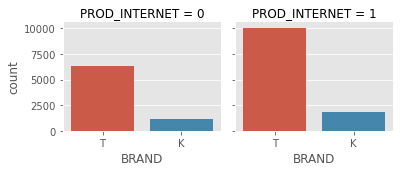

In [250]:
g = sns.catplot(x='BRAND',col='PROD_INTERNET',col_wrap=8,data=train[train.BRAND.notnull()],kind="count", height=2.5, aspect=1)

In [269]:
#remove na and no_tv customers, as they will not have internet anyway
train_no_na = train.dropna()
train_no_tv = train_no_na[train_no_na.PROD_TV != 0]

print('dataset has {} Number of rows and {} number of columns'.\
      format(train_no_tv.shape[0],train.shape[1]))

dataset has 13834 Number of rows and 15 number of columns


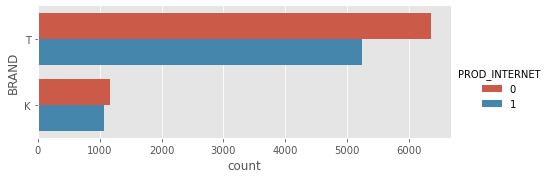

In [270]:
#visualize BRAND counts
ax = sns.catplot(y='BRAND',kind ='count',data=train_no_tv,height=2.6,aspect=2.5,hue ='PROD_INTERNET')

Text(0.5, 1.0, 'Name of segment based on postal code Distribution')

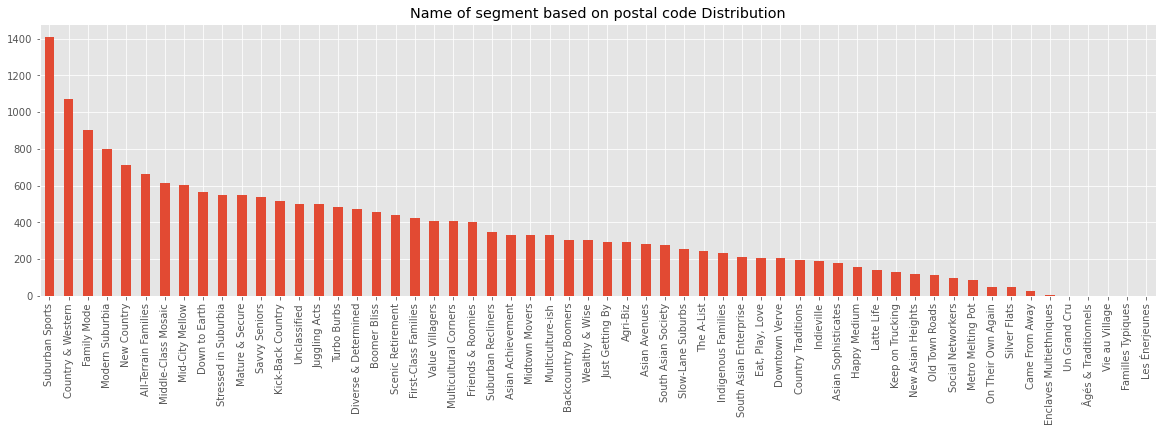

In [123]:
train['SEGMENT_NM'].unique()
ax = sns.catplot(y='PROD_TV',kind ='count',data=train,height=2.6,aspect=2.5,hue ='PROD_INTERNET')

seg_count = train['SEGMENT_NM'].value_counts()
plt.figure(figsize = (20, 5))
seg_count.plot(kind = "bar")
plt.title("Name of segment based on postal code Distribution")

In [206]:
train.groupby(['SEGMENT_NM','PROD_INTERNET']).agg({'PROD_INTERNET': 'count'})

PROD_INTERNET
SEGMENT_NM           PROD_INTERNET               
Agri-Biz             0                         43
                     1                        244
All-Terrain Families 0                        400
                     1                        254
Asian Achievement    0                        113
...                                           ...
Value Villagers      1                        217
Vie au Village       0                          1
Wealthy & Wise       0                         81
                     1                        216
Âgés & Traditionnels 0                          2

[111 rows x 1 columns]

Text(0.5, 1.0, 'Name of locality type based on postal code Distribution')

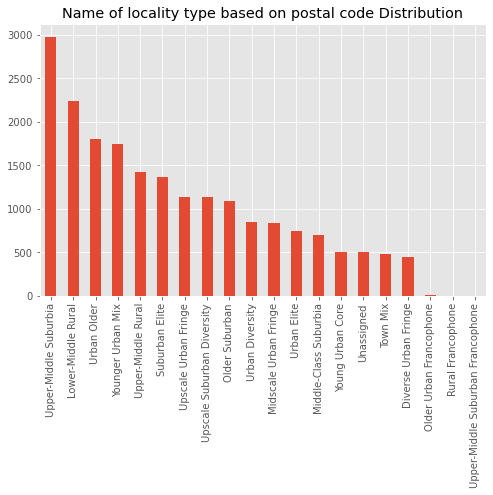

In [122]:
train['LOCALITY_NM'].unique()
loc_count = train['LOCALITY_NM'].value_counts()
plt.figure(figsize = (8, 5))
loc_count.plot(kind = "bar")
plt.title("Name of locality type based on postal code Distribution")

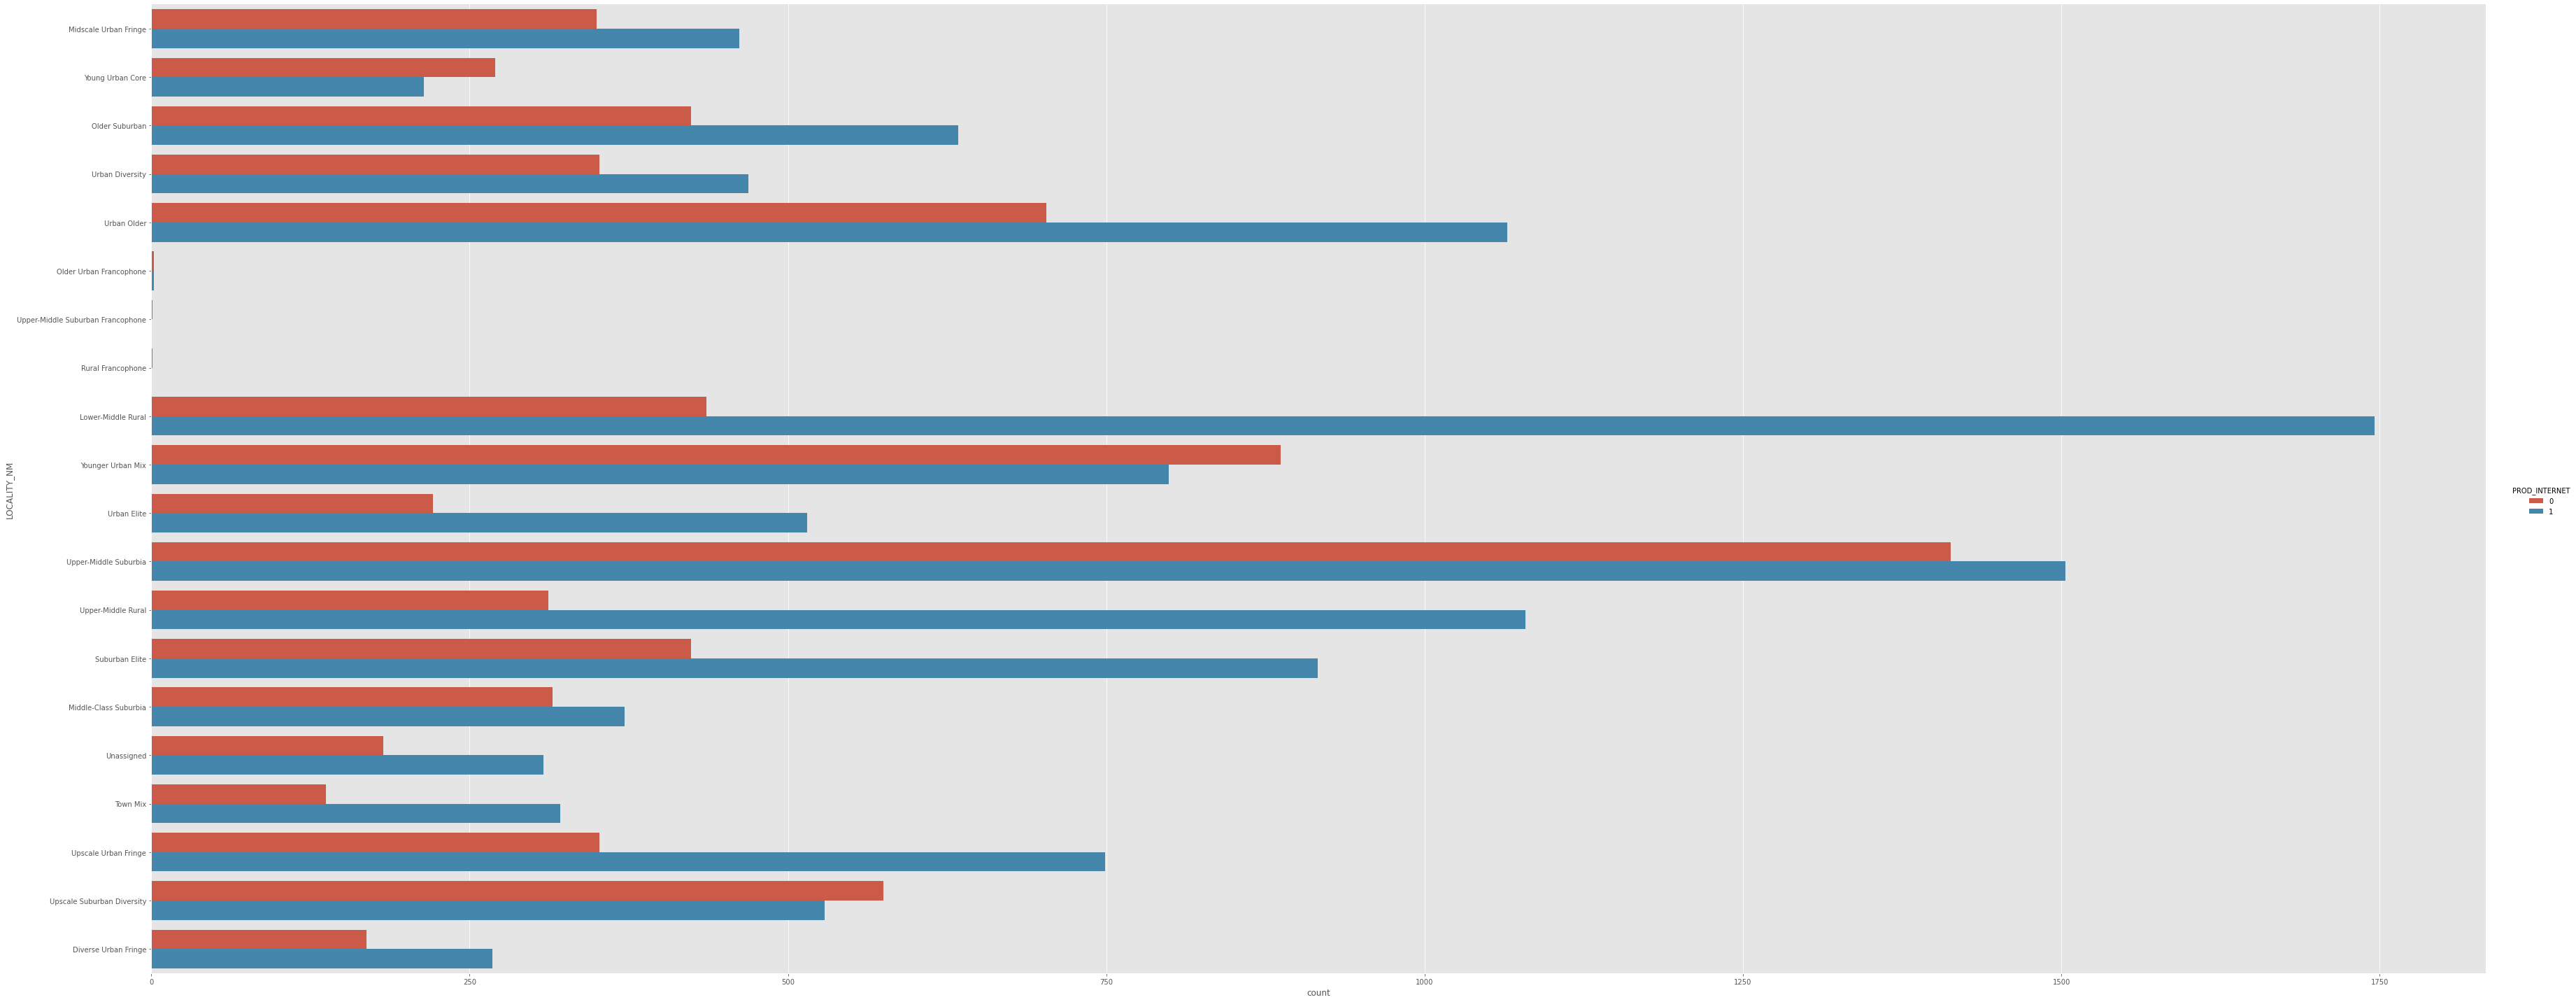

In [254]:
#visualize LOCALITY_NM counts
ax = sns.catplot(y='LOCALITY_NM',kind ='count',data=train,height=20,aspect=2.5,hue ='PROD_INTERNET')

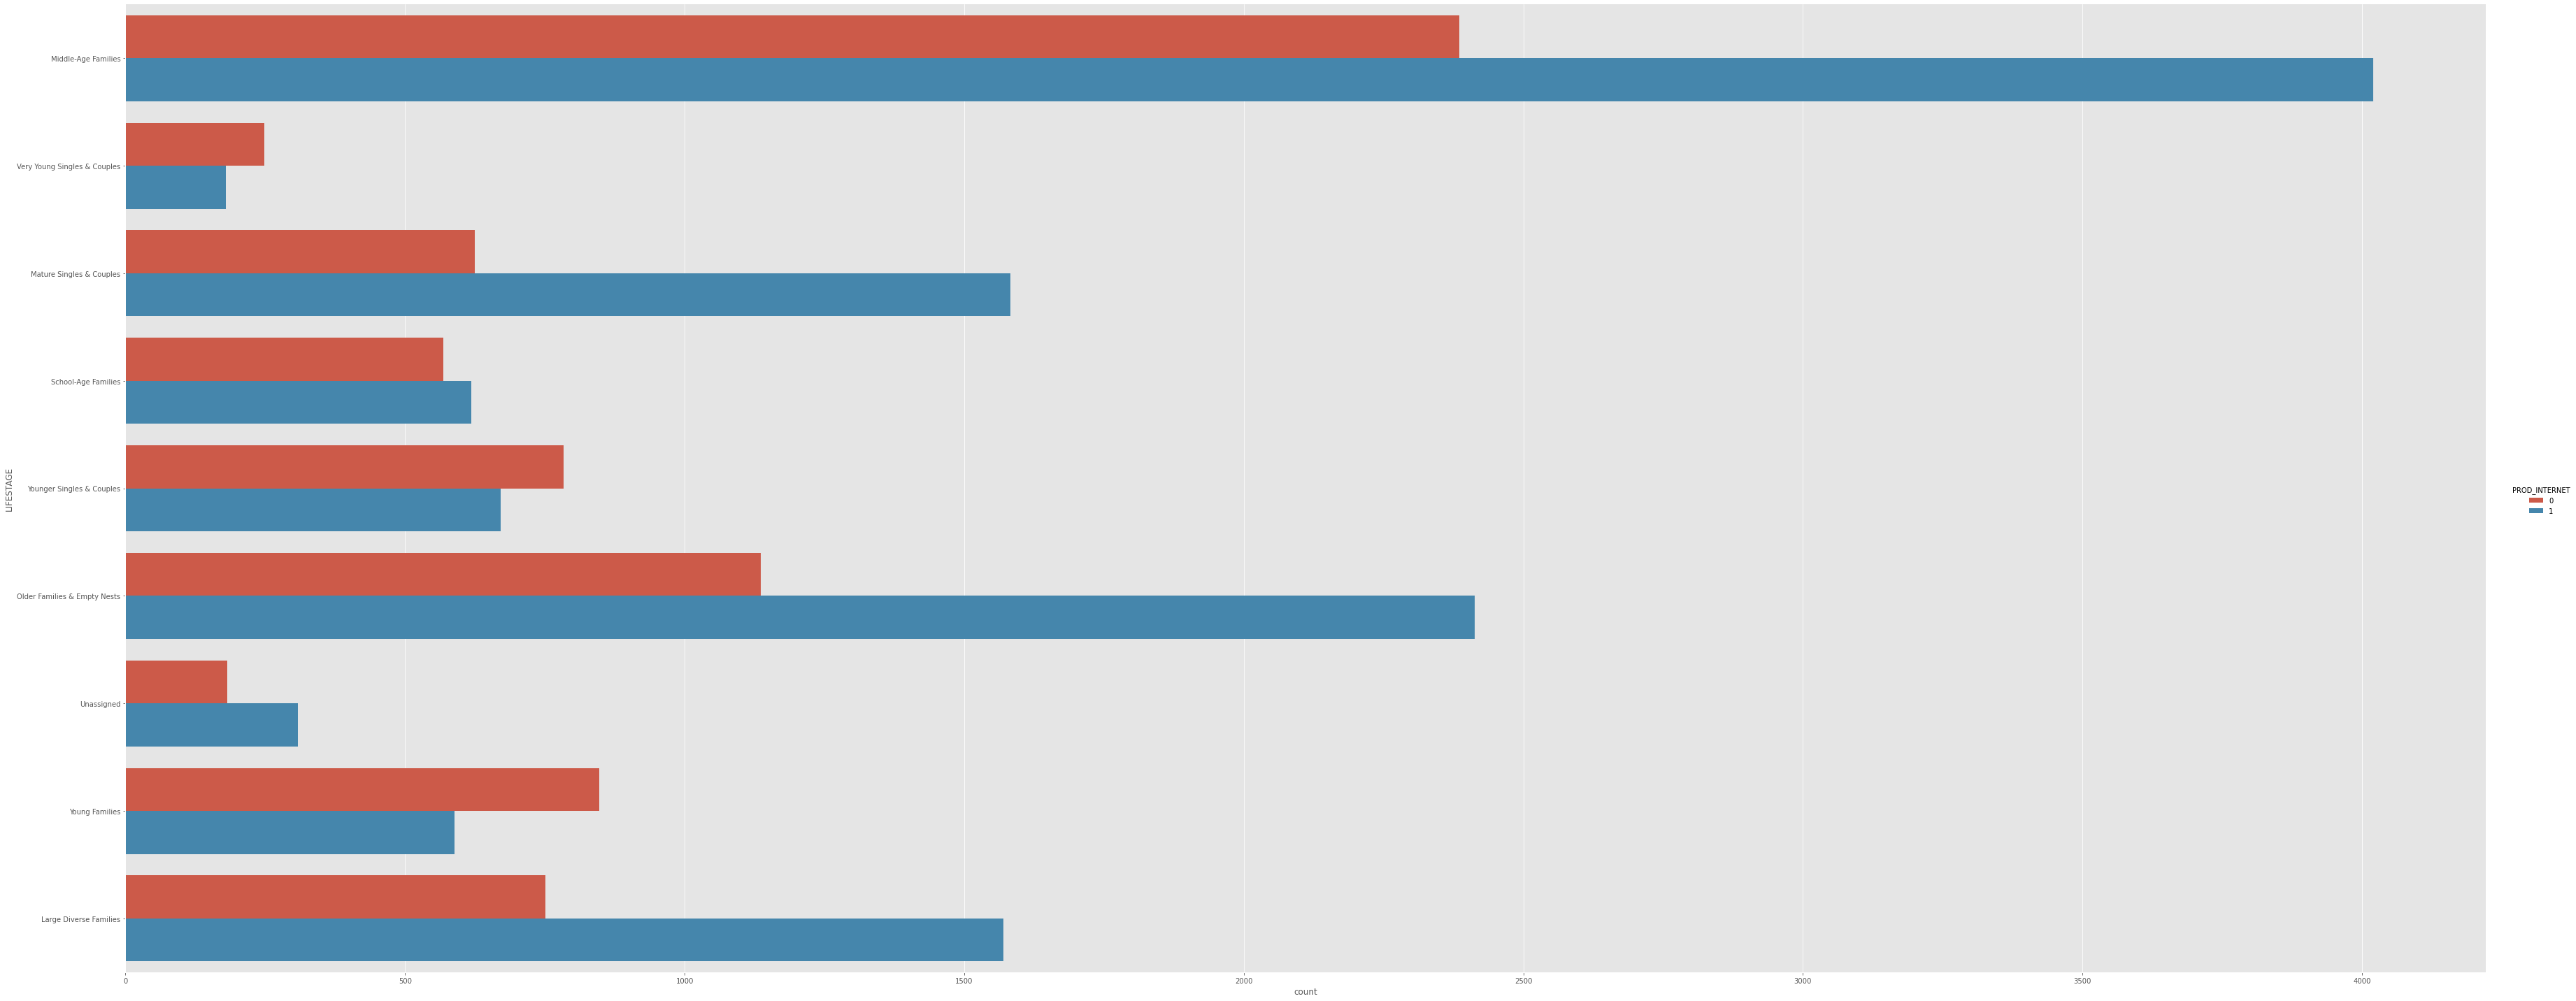

In [260]:
train['LIFESTAGE'].unique()
#visualize LOCALITY_NM counts
ax = sns.catplot(y='LIFESTAGE',kind ='count',data=train,height=20,aspect=2.5,hue ='PROD_INTERNET')

In [255]:
#plotting the distribution of object columns
train.groupby(['DEVICE_MANUFACTURER_TXT','PROD_INTERNET']).agg({'PROD_INTERNET': 'count'})
train.groupby('DEVICE_MANUFACTURER_TXT').count()

,BAN_hashed,IMSI_hashed,BRAND,MUNICIPALITY_NM,PROVINCE_STATE_CD,TENURE_DAY_QTY_SCALED,PRICE_PLAN,PROD_TV,PROD_INTERNET,SEGMENT_NM,LOCALITY_NM,LIFESTAGE,THREE_MONTH_AVG_WLN_BILLING_SCALED,THREE_MONTH_AVG_WLS_BILLING_SCALED
DEVICE_MANUFACTURER_TXT,,,,,,,,,,,,,,
ALCATEL,11,11,11,11,11,11,11,11,11,11,11,11,11,11
APPLE,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065,1065
ASUS,11,11,11,11,11,11,11,11,11,11,11,11,11,11
Alcatel / TCL,65,65,65,65,65,65,65,65,65,65,65,65,65,65
Apple,12101,12101,12101,12101,12101,12101,12101,12101,12101,12101,12101,12101,12101,12101
BLACKBERRY,12,12,12,12,12,12,12,12,12,12,12,12,12,12
BlackBerry,33,33,33,33,33,33,33,33,33,33,33,33,33,33
CAT,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Coolpad,13,13,13,13,13,13,13,13,13,13,13,13,13,13


In [251]:
#df = train.groupby('DEVICE_MANUFACTURER_TXT')['DEVICE_MANUFACTURER_TXT'].quantile(q=0.5)
for q in range(0,100,10):
    print(train['DEVICE_MANUFACTURER_TXT'].quantile(q/100, interpolation='nearest'))

ALCATEL
Apple
Apple
Apple
Apple
Apple
Apple
Google
Samsung
Samsung


In [97]:
#find all numerical values
numericals = ['TENURE_DAY_QTY_SCALED','THREE_MONTH_AVG_WLN_BILLING_SCALED','THREE_MONTH_AVG_WLS_BILLING_SCALED']

In [98]:
train[numericals].describe()

,TENURE_DAY_QTY_SCALED,THREE_MONTH_AVG_WLN_BILLING_SCALED,THREE_MONTH_AVG_WLS_BILLING_SCALED
count,20000.000000,19670.000000,19821.000000
mean,0.236995,0.025459,0.098132
std,0.192812,0.014784,0.064571
min,0.000071,0.000000,0.000000
25%,0.063214,0.017236,0.050632
50%,0.189786,0.024987,0.084400
75%,0.388732,0.033148,0.129469
max,0.929643,1.000000,1.000000


We have got a descriptive statsitics of all the numerical columns.

In [105]:
train.groupby('PROD_INTERNET')[numericals].mean()

,TENURE_DAY_QTY_SCALED,THREE_MONTH_AVG_WLN_BILLING_SCALED,THREE_MONTH_AVG_WLS_BILLING_SCALED
PROD_INTERNET,,,
0,0.203502,0.027243,0.098745
1,0.258145,0.024342,0.097743


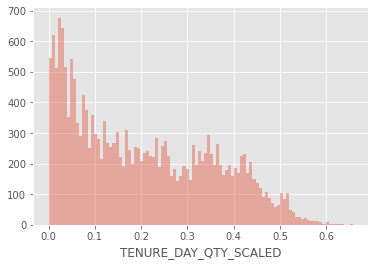

In [111]:
temp = np.log(train['TENURE_DAY_QTY_SCALED']+1)
ax=sns.distplot(temp,bins=100,kde=False)

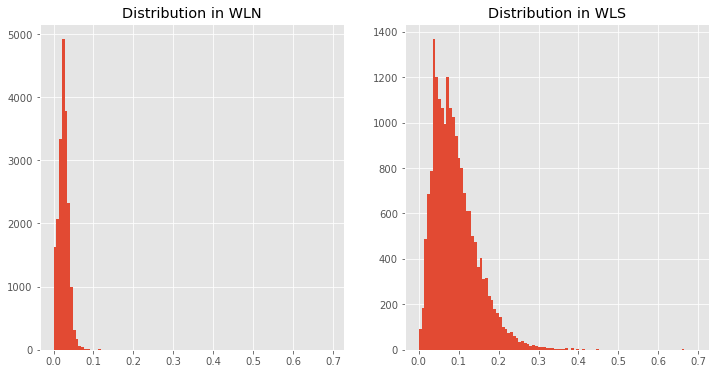

In [115]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.set(title='Distribution in WLN')
ax1.hist(np.log(train['THREE_MONTH_AVG_WLN_BILLING_SCALED'] + 1),bins=100)

ax2.set(title='Distribution in WLS')
ax2.hist(np.log(train['THREE_MONTH_AVG_WLS_BILLING_SCALED'] + 1),bins=100)

plt.show()

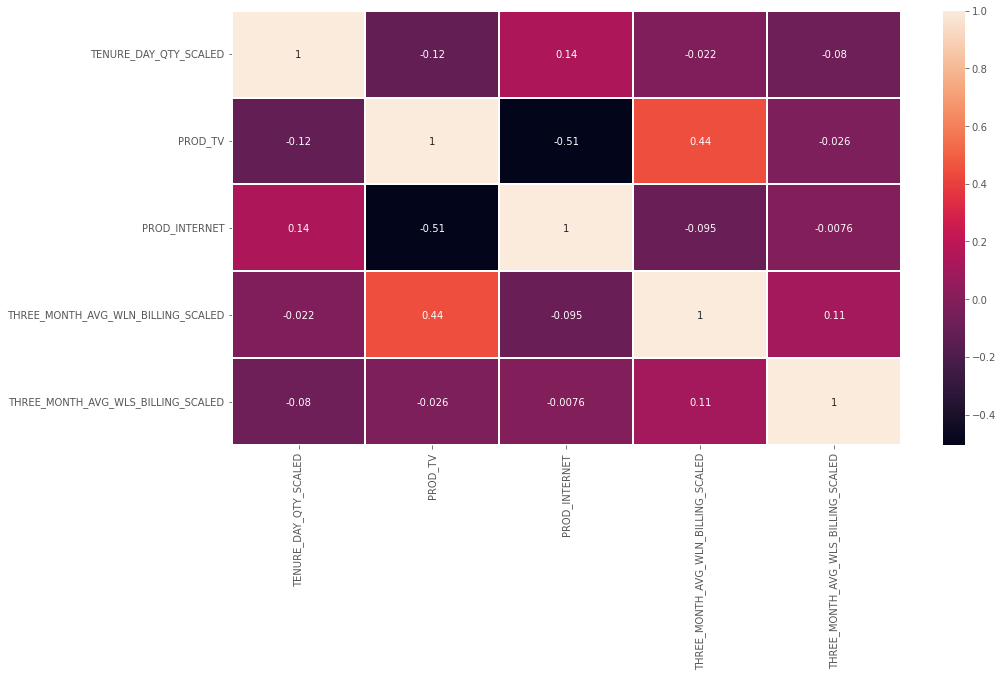

In [118]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr,xticklabels=corr.columns,yticklabels = corr.columns,
            linewidths=.2,annot=True)

In [ ]:
train.info()  #checks the informarion